Iteration 0, Loss: -0.02810582146048546
Iteration 100, Loss: -0.9782138466835022
Iteration 200, Loss: -0.9854786992073059
Iteration 300, Loss: -0.9885929226875305
Iteration 400, Loss: -0.9903542995452881
Iteration 500, Loss: -0.991520345211029
Iteration 600, Loss: -0.9923608303070068
Iteration 700, Loss: -0.9929524064064026
Iteration 800, Loss: -0.9934136271476746
Iteration 900, Loss: -0.9937630891799927
Iteration 1000, Loss: -0.9940707683563232
Iteration 1100, Loss: -0.9943193793296814
Iteration 1200, Loss: -0.9945265054702759
Iteration 1300, Loss: -0.9947104454040527
Iteration 1400, Loss: -0.9948603510856628
Iteration 1500, Loss: -0.9950031042098999
Iteration 1600, Loss: -0.9951387643814087
Iteration 1700, Loss: -0.9952430129051208
Iteration 1800, Loss: -0.9953526258468628
Iteration 1900, Loss: -0.9954493641853333
Iteration 2000, Loss: -0.9955459833145142
Iteration 2100, Loss: -0.995629608631134
Iteration 2200, Loss: -0.9957031607627869
Iteration 2300, Loss: -0.995780348777771
Iterat

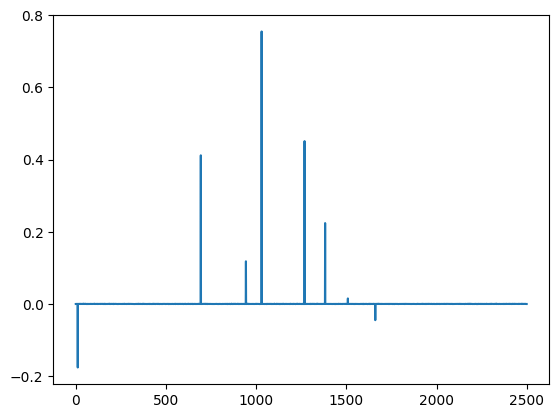

In [2]:
import torch
import argparse
import numpy as np
import torch.nn.functional as F
from torch import nn
from copy import deepcopy



model_path = 'C:/Users/kubov/Documents/git_projects/mode_connectivity_interpretability/models/L1_lambda_2e-05_model.pth'
# Setup target device 
#device = torch.device("cpu")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Import the model class from your specific location.
from model_builder import SimpleMLP

# Hyperparameters (same as train.py)
INPUT_SHAPE = 2500
OUTPUT_SHAPE = 12
HIDDEN_UNITS1 = 128  # Number of neurons in the first hidden layer
HIDDEN_UNITS2 = 64  # Number of neurons in the second hidden layer
BATCH_SIZE = 128


# Initialize the model
model = SimpleMLP(
    input_shape=INPUT_SHAPE,
    hidden_units1=HIDDEN_UNITS1,
    hidden_units2=HIDDEN_UNITS2,
    output_shape=OUTPUT_SHAPE
).to(device)

# Load the saved state_dict into the model
model_path = model_path
model_state_dict = torch.load(model_path, map_location=torch.device('cpu'))
model.load_state_dict(model_state_dict)


# Assume 'model' is your trained MLP and 'device' is your target device
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Freeze model parameters
for param in model.parameters():
    param.requires_grad = False



import torch

# Set the random seed for both CPU and CUDA
seed = 42
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# Initialize input with random noise
input_shape = (1, INPUT_SHAPE)  # Batch size of 1, and whatever your input shape is


initial_noise = torch.rand(input_shape, device=device) * 0.001  # Scale to [0, 0.01]
initial_noise.requires_grad = True


# Define optimizer for the noise
optimizer = torch.optim.Adam([initial_noise], lr=0.01)

# Target neuron index
target_neuron = 5  # Replace this with the index of the neuron you want to excite

# Optimization loop
n_iterations = 10000
for i in range(n_iterations):
    optimizer.zero_grad()
    
    # Forward pass
    output = model(initial_noise)
    
    # Custom loss function
    # Excite the target neuron while inhibiting others
    # loss = -output[0, target_neuron] + F.relu(output).sum() - F.relu(output[0, target_neuron]) # this should be used if there is not a softmax layer
    loss = -output[0, target_neuron] + 0.000002*torch.sum(torch.abs(initial_noise))
    # Backward pass
    loss.backward()
    
    # Update the noise
    optimizer.step()

    # Print progress
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}")

# The optimized noise
optimized_input = initial_noise.detach().cpu().numpy()
optimized_input2 = initial_noise



import matplotlib.pyplot as plt

plt.plot(optimized_input.T)

# Detach the optimized input from its computational graph
optimized_input = initial_noise.detach()

# Forward pass through the model to observe the output
with torch.no_grad():  # Ensure no gradients are calculated
    observed_output = model(optimized_input)  # unsqueeze to add the batch dimension

# Print or analyze the output
print("Model's output:", observed_output)
print("winning class:", torch.argmax(observed_output))


NameError: name 'input_shape' is not defined

In [1]:
# Define your alphas, i.e., the interpolation coefficients
alphas = torch.linspace(0, 1, 1000, device=device)  # 1000 points between 0 and 1

# Initialize an empty tensor to store the interpolated points
interpolated_points = torch.zeros((len(alphas), *optimized_input1.shape), device=device)

# Perform the linear interpolation for each alpha
for i, alpha in enumerate(alphas):
    interpolated_points[i] = (1 - alpha) * optimized_input1 + alpha * optimized_input2

# Make sure the model is in evaluation mode and gradients are off
model.eval()

# Initialize a tensor to store model outputs
model_outputs = torch.zeros((len(alphas), OUTPUT_SHAPE), device=device)

# Feed interpolated points to the model and store the output
with torch.no_grad():
    for i, point in enumerate(interpolated_points):
        model_outputs[i] = model(point)

# Here, `model_outputs` contains the model's output for each interpolated point.


NameError: name 'torch' is not defined

In [21]:
model_outputs

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]], device='cuda:0')